<a href="https://colab.research.google.com/github/Deepty11/GastroIntestinal-Pathological-Findings-Classification/blob/main/MobileNet_v2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/dirve")

Mounted at /content/dirve


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import random
from tqdm import tqdm
from keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow
from keras.models import Sequential
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras import applications 
from keras.utils.np_utils import to_categorical 
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow import keras
%matplotlib inline
import math 
import datetime
import time
BATCH_SIZE = 70
SHUFFLE_BUFFER_SIZE = 1024
IMAGE_SIZE = 300

# Data Preprocessing

In [3]:
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/dirve/MyDrive/Thesis work/dataset_v2'
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   horizontal_flip = True,
                                   validation_split = 0.1)
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split = 0.1)

train_datagen = train_datagen.flow_from_directory(base_dir,
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                  subset = "training",
                                                  shuffle = True
                                                  )

validation_datagen = validation_datagen.flow_from_directory(base_dir,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            shuffle =False,
                                            subset ="validation")

Found 5403 images belonging to 6 classes.
Found 598 images belonging to 6 classes.


In [4]:
test_dir = '/content/dirve/MyDrive/Thesis work/dataset'

test_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)


test_datagen = test_datagen.flow_from_directory(test_dir,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            shuffle =False,
                                            subset = "validation")

Found 600 images belonging to 6 classes.


# Building Model

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, 
                                             include_top=False)
base_model.trainable = False

base_model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(150, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(70, activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(6, activation='softmax')
])

base_model.summary()

base_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 80
steps_per_epoch = np.ceil(train_datagen.n / BATCH_SIZE)
validation_steps = np.ceil(validation_datagen.n / BATCH_SIZE)



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 9, 9, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_12  (None, 1024)              0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_36 (Dense)             (None, 150)               153750    
_________________________________________________________________
batch_normalization_26 (Batc (None, 150)               600       
_________________________________________________________________
dropout_24 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 70)              

In [ ]:
# class EarlyStopByF1(keras.callbacks.Callback):
#     def __init__(self, value = 0, verbose = 0):
#         super(keras.callbacks.Callback, self).__init__()
#         self.value = value
#         self.verbose = verbose


#     def on_epoch_end(self, epoch, logs={}):
#          predict = np.asarray(self.model.predict(self.validation_datagen[0]))
#          target = self.validation_data[1]
#          score = f1_score(target, prediction)
#          if score > self.value:
#             if self.verbose >0:
#                 print("Epoch %05d: early stopping Threshold" % epoch)
#             self.model.stop_training = True


# callbacks = [EarlyStopByF1(value = .88, verbose =1)]

# Training Model

In [ ]:
es = EarlyStopping(monitor='val_loss', mode= 'min', verbose=1, patience= 3)
ms = ModelCheckpoint(filepath='/content/dirve/MyDrive/Thesis work/mobileNet_best_model.h5',
                     monitor='val_loss', 
                     save_best_only=True)

history = base_model.fit(train_datagen,
                        steps_per_epoch = steps_per_epoch,
                        epochs=epochs,
                        validation_data=validation_datagen,
                        validation_steps=validation_steps,
                        callbacks = [es,ms]
                        )

base_model.save('/content/dirve/MyDrive/Thesis work/MobileNet_TransferLearning_KVasir.h5')
print("Completed!")


Epoch 1/80
78/78 [==============================] - 229s 3s/step - loss: 1.8765 - accuracy: 0.3548 - val_loss: 1.1306 - val_accuracy: 0.6438
Epoch 2/80
78/78 [==============================] - 199s 3s/step - loss: 1.1359 - accuracy: 0.5812 - val_loss: 0.6974 - val_accuracy: 0.7726
Epoch 3/80
78/78 [==============================] - 199s 3s/step - loss: 0.8697 - accuracy: 0.6798 - val_loss: 0.5280 - val_accuracy: 0.8261
Epoch 4/80
78/78 [==============================] - 202s 3s/step - loss: 0.7477 - accuracy: 0.7344 - val_loss: 0.4672 - val_accuracy: 0.8278
Epoch 5/80
78/78 [==============================] - 202s 3s/step - loss: 0.6380 - accuracy: 0.7696 - val_loss: 0.4329 - val_accuracy: 0.8411
Epoch 6/80
78/78 [==============================] - 202s 3s/step - loss: 0.5719 - accuracy: 0.7890 - val_loss: 0.4154 - val_accuracy: 0.8445
Epoch 7/80
78/78 [==============================] - 202s 3s/step - loss: 0.5498 - accuracy: 0.7981 - val_loss: 0.4015 - val_accuracy: 0.8478
Epoch 8/80
78

# PLotting Accuracy & Loss Curve during Training

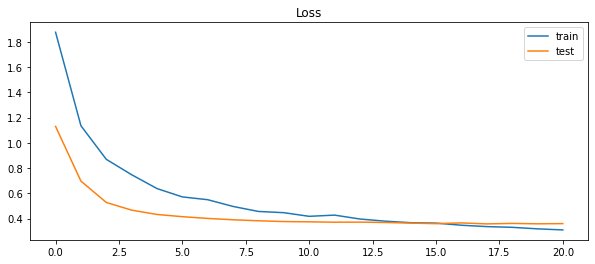

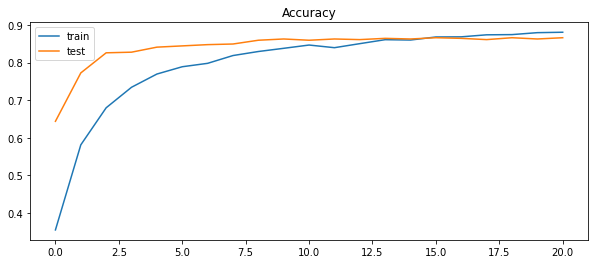

In [ ]:
import matplotlib.pyplot as plt
# plot loss during training
# history = model.history
# plt.subplot(211)
plt.figure(figsize= (10,4))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
# plt.subplot(212)
plt.figure(figsize= (10,4))
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
while True:
  x += 1

NameError: ignored

# Load the saved  model

In [5]:
from keras.models import load_model
model = load_model('/content/dirve/MyDrive/Thesis work/MobileNet_TransferLearning_KVasir.h5')

# Prediction & Evaluation

In [8]:
#Validation set prediction
pred_val= model.predict(validation_datagen)
labels_val= validation_datagen.classes
predicted_class_indices_val = np.argmax(pred_val,axis=1)


In [12]:
#Training Set Prediction
train_datagen.reset()
pred_train= model.predict(train)
labels_train = train.classes
predicted_class_indices_train=np.argmax(pred_train,axis=1)


In [13]:
#Test Set Prediction
pred_test= model.predict(test_datagen)
labels_test = test_datagen.classes
predicted_class_indices_test=np.argmax(pred_test,axis=1)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

#Confusion Matrix and Accuracy
confusion_matrix_train = confusion_matrix(labels_train,predicted_class_indices_train)
confusion_matrix_val = confusion_matrix(labels_val,predicted_class_indices_val)
confusion_matrix_test = confusion_matrix(labels_test,predicted_class_indices_test)

print("Training Classification Reports:\n")
print(classification_report(labels_train,predicted_class_indices_train))

print("Test Classification Reports:\n")
print(classification_report(labels_test,predicted_class_indices_test))

print("Validation Classification Reports:\n")
print(classification_report(labels_val,predicted_class_indices_val))
print("Training accuracy score:", accuracy_score(labels_train, predicted_class_indices_train))
#print("Training F1 score:", f1_score(labels_train, predicted_class_indices_train))
#print("Training Precision score:", precision_score(labels_train, predicted_class_indices_train))
#print("Training Recall score:", recall_score(labels_train, predicted_class_indices_train))

print("Validation accuracy score:", accuracy_score(labels_val, predicted_class_indices_val))
#print("Validation F1 score:", f1_score(labels_val, predicted_class_indices_val))
#print("Validation Precision score:", precision_score(labels_val, predicted_class_indices_val))
#print("Validation Recall score:", recall_score(labels_val, predicted_class_indices_val))

print("Test accuracy score:", accuracy_score(labels_test, predicted_class_indices_test))



Training Classification Reports:

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       800
           1       0.96      0.98      0.97       799
           2       0.98      0.99      0.99       800
           3       0.81      0.92      0.86       805
           4       0.99      0.96      0.97       800
           5       0.98      0.96      0.97       798

    accuracy                           0.93      4802
   macro avg       0.94      0.93      0.93      4802
weighted avg       0.94      0.93      0.93      4802

Test Classification Reports:

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.92      0.96      0.94       100
           2       0.97      1.00      0.99       100
           3       0.85      0.88      0.86       100
           4       0.93      0.90      0.91       100
           5       0.95      0.91      0.93       100

    accuracy 

# HeatMap of Classification Results

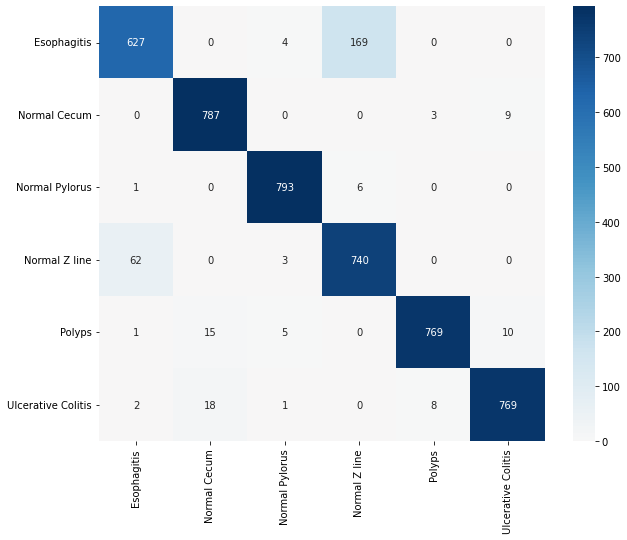

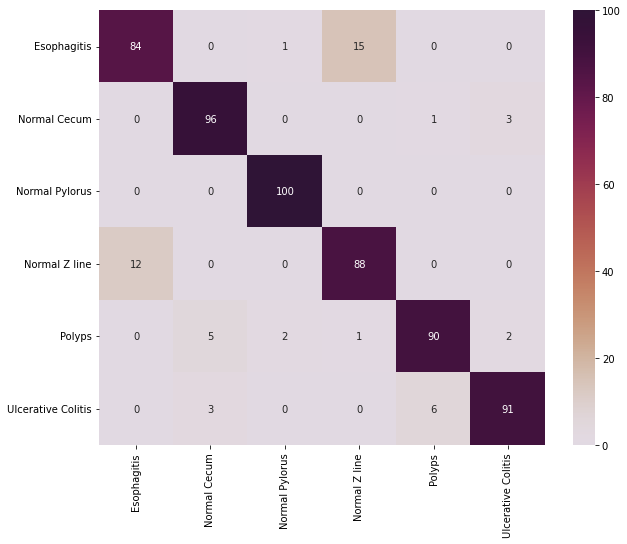

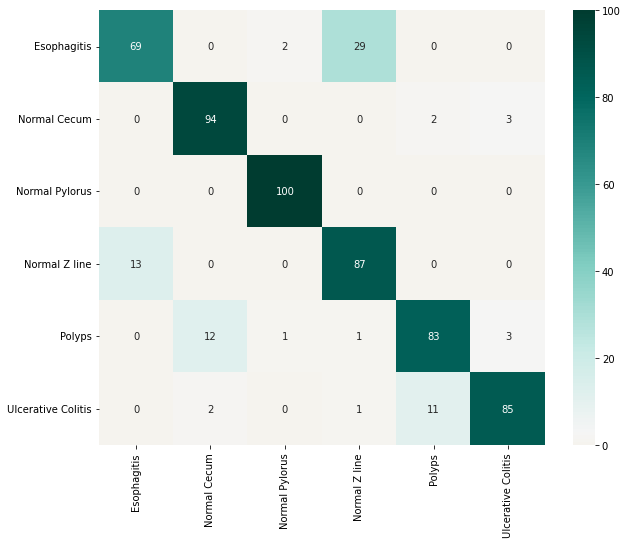

In [56]:
#Plot confusion matrix
categories = ["Esophagitis","Normal Cecum","Normal Pylorus","Normal Z line", "Polyps","Ulcerative Colitis"]
plt.figure(figsize=(10,8))
ax = sns.heatmap(confusion_matrix_train, annot = True, fmt= "d", xticklabels=categories, yticklabels=categories,center= 1.0, cmap="RdBu")
plt.show()
plt.figure(figsize=(10,8))
ax = sns.heatmap(confusion_matrix_test, annot = True, fmt= "d", xticklabels=categories, yticklabels=categories,center= 1.0, cmap="twilight_shifted")
plt.show()
plt.figure(figsize=(10,8))
ax = sns.heatmap(confusion_matrix_val, annot = True, fmt= "d", xticklabels=categories, yticklabels=categories,center= 3.0, cmap = "BrBG")
plt.show()

In [20]:
train_datagen.class_indices

{'esophagitis': 0,
 'normal_cecum': 1,
 'normal_pylorus': 2,
 'normal_z_line': 3,
 'polyps': 4,
 'ulcerative_colitis': 5}